In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("data.csv")


In [295]:
from sklearn.model_selection import train_test_split
df = pd.DataFrame(data)

X = df[["Land", "Card Advnatage", "Interaction", "Creature", "Ramp"]]
y = df["Keep"]
X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 25)


Expert system 


In [296]:
def expert_system_prediction(hand, prediction):
    land = hand[0]
    creature = hand[1]
    card_adv = hand[2]
    interaction = hand[3]
    ramp = hand[4]    

    if land == 0:
        return 0
    elif land > 4:
        return 0
    
    if land == 1:
        if card_adv < 2:
            return 0
        elif ramp < 1:
            return 0

    if land + ramp > 5:
        return 0
    return prediction


Artificial Neural Network Prediction

In [297]:
def activation_function(x):
    """
    output_activation_function applies the sigmoid activation function 
    
    :param x: input data
    """
    return 1 / (1 + np.exp(-x))

def activation_derivative(x):
    """
    output_activation_function applies the sigmoid activation function derivative 
    
    :param x: input data
    """
    return activation_function(x) * (1 - activation_function(x))

def feedforward(X, w_input_to_hidden, b_input_to_hidden, w_hidden_to_output, b_hidden_to_output):
    """
    feedforward returns the otputs of the activation function applied on the weight X feature + the bias
    a = f(wp + b)

    :X:                 input training data
    :w_input_to_hidden: weights used between the input and hidden layer
    :b_input_to_hidden: bias used between the input and hidden layer
    :w_hidden_to_output: weights used between the hidden and output layer
    :b_hidden_to_output: bias used between the hidden and output layer
    """
    z_input = np.dot(X, w_input_to_hidden) + b_input_to_hidden

    a_input = activation_function(z_input)

    z_hidden = np.dot(a_input, w_hidden_to_output) + b_hidden_to_output
    a_hidden = activation_function(z_hidden)
    return a_input, a_hidden

In [298]:
hidden_Layer_neurons = 3
output_neruons = 1

# Initialize weights
w_input_to_hidden = np.random.uniform(size=(X_train.shape[1], hidden_Layer_neurons))
w_hidden_to_output = np.random.uniform(size=(hidden_Layer_neurons, output_neruons))

b_input_to_hidden = np.zeros((1, hidden_Layer_neurons))
b_hidden_to_output = np.zeros((1, output_neruons))

learning_rate = .01
epochs = 10000
for x in range(epochs):
    a_input, a_hidden = feedforward(X_train, w_input_to_hidden, b_input_to_hidden, w_hidden_to_output, b_hidden_to_output)

    #=== Back Propagation ===#
    error_output = y_train - a_hidden
    delta_output = error_output * activation_derivative(a_hidden)

    # delta weight = eta X 
    hidden_layer_delta = np.dot(delta_output, w_hidden_to_output.T) * activation_derivative(a_input)

    w_hidden_to_output += np.dot(a_input.T, delta_output) * learning_rate
    b_input_to_hidden += np.sum(delta_output) * learning_rate

    w_input_to_hidden += np.dot(X_train.T, hidden_layer_delta) * learning_rate
    b_hidden_to_output += np.sum(delta_output) * learning_rate

    if x % 100 == 0:
        print(np.mean(np.abs(error_output)))


0.5134165860998143
0.4957649386149435
0.4790305437967934
0.4621410623218976
0.45363580793146363
0.4512083770351912
0.45283853089503134
0.4548657208314922
0.4563978016664826
0.45740923705525655
0.45798560462613874
0.4582182986359536
0.45820177158901704
0.4580346718431247
0.45780292850682397
0.4575515111846217
0.457277316338055
0.4569525247505789
0.45655243776510956
0.456068534703911
0.45550842760793075
0.4548902612706095
0.4542364328331894
0.4535688456479375
0.45290632670609393
0.4522638660205809
0.4516529199893794
0.4510820382636883
0.4505573388539461
0.4500828176833995
0.4496610681561448
0.44929528009546427
0.4489926970559387
0.44876797235666166
0.4486435962736675
0.44864584964687565
0.44879798553191025
0.449114006327057
0.44959488420775534
0.450226838599993
0.4509808690889734
0.45181390489166023
0.4526729008636893
0.45350258634364116
0.4542548781960708
0.4548944971174867
0.4553994102578792
0.4557649704881761
0.45600965680825534
0.45616730488082585
0.45626947684663527
0.45633390685331

In [330]:
nn_y_hat = []
for sample in range(len(X_test)):
    a_input, a_hidden = feedforward(np.array(X_test[sample]), w_input_to_hidden, b_input_to_hidden, w_hidden_to_output, b_hidden_to_output)
    
    predict = ""
    if a_hidden > 0.5:
        predict = "Keep"
        nn_y_hat.append(1)
    else:
        predict = "Mulligan"
        nn_y_hat.append(0)

    truth = "Keep" if y_test[sample] else "Mulligan"

nn_y_hat = np.array(nn_y_hat)



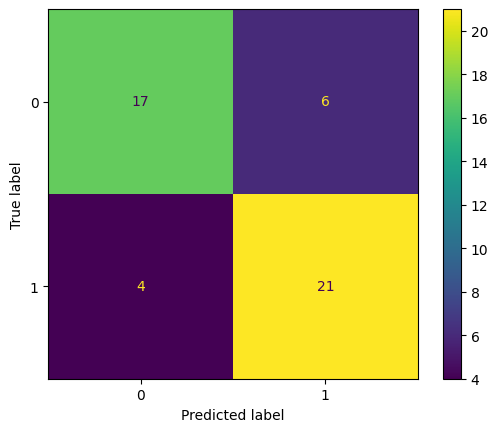

In [328]:
cm = confusion_matrix(y_test, nn_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [325]:
tp_tn = cm[0][0] + cm[1][1]
total = tp_tn + cm[0][1] + cm[1][0]
acc = f"{tp_tn/total:.2%}"
print("Accuracy: " + acc)

Accuracy: 79.17%


Artificial Neural Network Prediction with Expert System


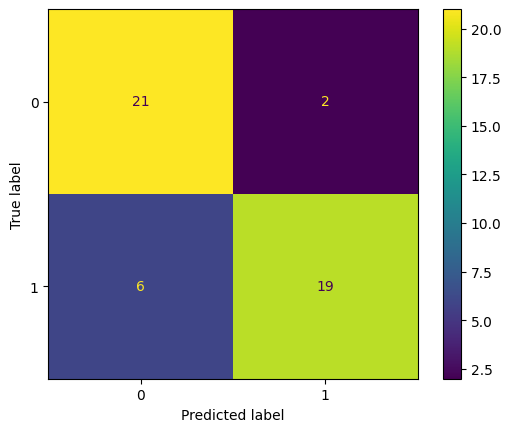

In [329]:
expert_y_hat = []
for sample in range(len(X_test)):
    expert_y_hat.append(expert_system_prediction(X_test[sample], nn_y_hat[sample]))
cm = confusion_matrix(y_test, expert_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [327]:
tp_tn = cm[0][0] + cm[1][1]
total = tp_tn + cm[0][1] + cm[1][0]
acc = f"{tp_tn/total:.2%}"
print("Accuracy: " + acc)

Accuracy: 83.33%


Random Forest Prediction

In [302]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train.reshape(1, -1)[0])

rf_y_hat = []
for sample in range(len(X_test)):
    prediction = clf.predict([X_test[sample]])

    predict = ""
    if prediction > 0.5:
        predict = "Keep"
        rf_y_hat.append(1)
    else:
        predict = "Mulligan"
        rf_y_hat.append(0)
    #print("Predicted: " + predict)

    truth = "Keep" if y_test[sample] else "Mulligan"
    #print("Actual: " + truth)
    #print()

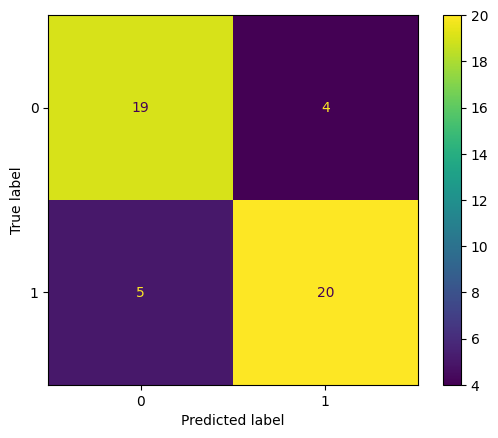

In [310]:
cm = confusion_matrix(y_test, rf_y_hat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [320]:
tp_tn = cm[0][0] + cm[1][1]
total = tp_tn + cm[0][1] + cm[1][0]
acc = f"{tp_tn/total:.2%}"
print("Accuracy: " + acc)

Accuracy: 81.25%


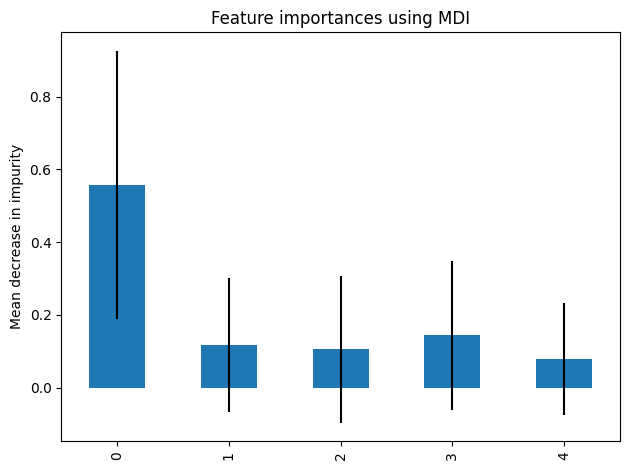

In [304]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Logistic Regression Prediction

In [305]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train.reshape(1, -1)[0])

lr_y_hat = []
for sample in range(len(X_test)):
    prediction_prob = clf.predict_proba([X_test[sample]])[0]
    prediction = max(range(len(prediction_prob)), key=prediction_prob.__getitem__)    
    if prediction > 0.5:
        predict = "Keep"
        lr_y_hat.append(1)
    else:
        predict = "Mulligan"
        lr_y_hat.append(0)
    #print("Predicted: " + predict)

    truth = "Keep" if y_test[sample] else "Mulligan"
    #print("Actual: " + truth)
    #print()

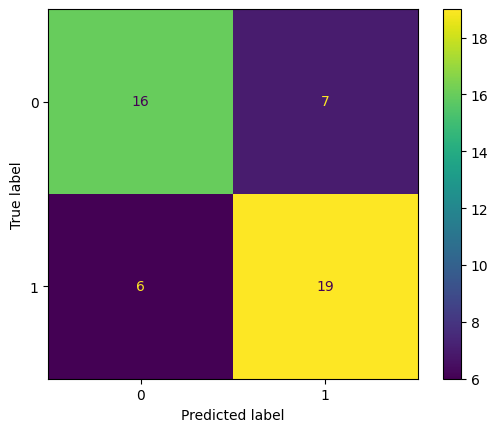

In [322]:

cm = confusion_matrix(y_test, lr_y_hat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [323]:
tp_tn = cm[0][0] + cm[1][1]
total = tp_tn + cm[0][1] + cm[1][0]
acc = f"{tp_tn/total:.2%}"
print("Accuracy: " + acc)

Accuracy: 72.92%
